In [1]:
!pip install PyWavelets
!pip install scikit-learn
!pip install opencv-python
!pip install matplotlib

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import os

print(os.path.exists('./test_image/abd.jpg'))


True


In [4]:
img = cv2.imread('./test_image/abd.jpg')
print(img.shape)

(900, 1200, 3)


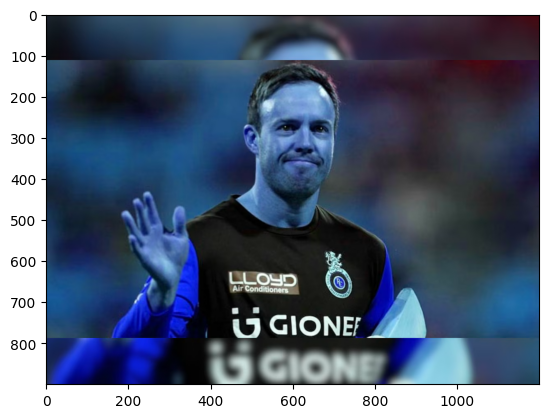

In [5]:
plt.imshow(img)

In [6]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1200)

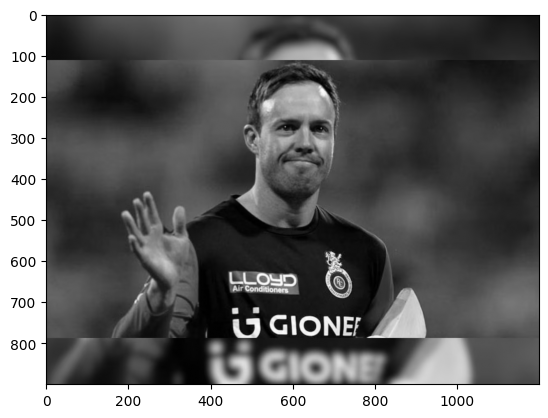

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
gray


array([[40, 39, 39, ..., 18, 18, 18],
       [40, 40, 40, ..., 18, 18, 18],
       [40, 40, 40, ..., 18, 18, 18],
       ...,
       [56, 58, 60, ..., 75, 75, 75],
       [56, 58, 60, ..., 74, 74, 74],
       [56, 58, 60, ..., 74, 74, 74]], shape=(900, 1200), dtype=uint8)

In [9]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')


faces =face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[514, 190, 222, 222]], dtype=int32)

In [10]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(514), np.int32(190), np.int32(222), np.int32(222))

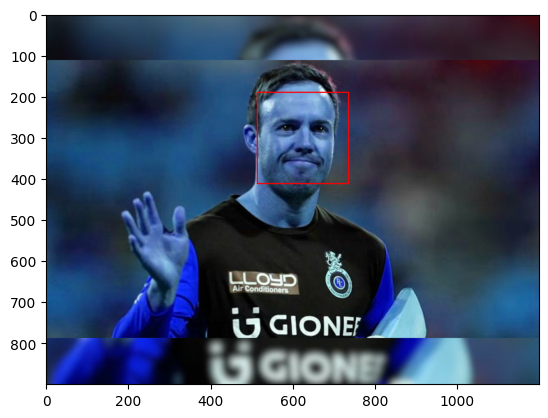

In [11]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

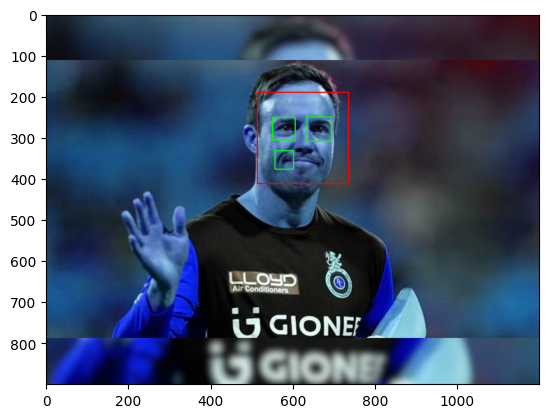

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

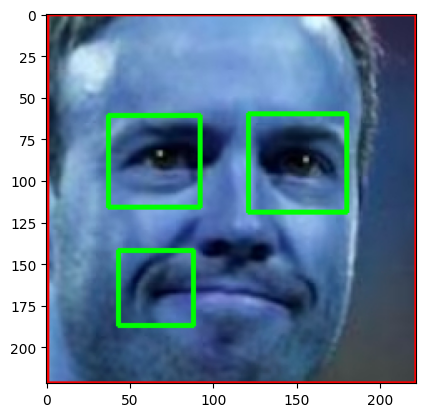

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not loaded: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

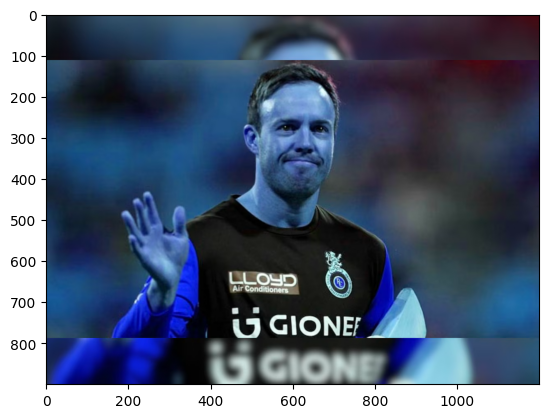

In [17]:
original_image = cv2.imread('./test_image/abd.jpg')
plt.imshow(original_image)

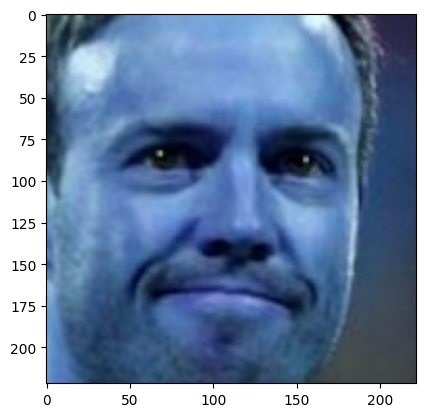

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/abd.jpg')
plt.imshow(cropped_image)

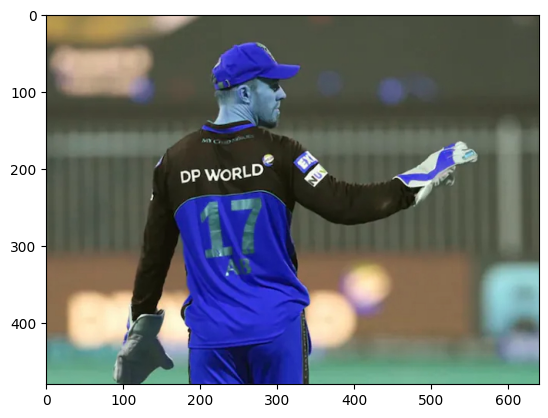

In [20]:
org_image_obstructed = cv2.imread('./test_image/abd2.jpg')
plt.imshow(org_image_obstructed)

In [21]:
cropped_image_if_2_eyes = get_cropped_image_if_2_eyes('./test_image/abd2.jpg')
cropped_image_if_2_eyes

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [23]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs

['./dataset/abd',
 './dataset/cropped',
 './dataset/msd',
 './dataset/sachin',
 './dataset/virat',
 './dataset/yuvi']

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


abd
Generating cropped images in folder: ./dataset/cropped/abd
Image not loaded: ./dataset/abd\abd_suspension_10ml_3_0.htm
Image not loaded: ./dataset/abd\com_lookaside_crawler_media_ (1).htm
Image not loaded: ./dataset/abd\com_lookaside_crawler_media_ (2).htm
Image not loaded: ./dataset/abd\com_lookaside_crawler_media_.htm
Image not loaded: ./dataset/abd\com_seo_google_widget_crawler_ (1).htm
Image not loaded: ./dataset/abd\com_seo_google_widget_crawler_ (2).htm
Image not loaded: ./dataset/abd\com_seo_google_widget_crawler_.htm
Image not loaded: ./dataset/abd\image.htm
cropped
Image not loaded: ./dataset/cropped\abd
msd
Generating cropped images in folder: ./dataset/cropped/msd
Image not loaded: ./dataset/msd\com_lookaside_crawler_media_ (1).htm
Image not loaded: ./dataset/msd\com_lookaside_crawler_media_ (2).htm
Image not loaded: ./dataset/msd\com_lookaside_crawler_media_ (3).htm
Image not loaded: ./dataset/msd\com_lookaside_crawler_media_ (4).htm
Image not loaded: ./dataset/msd\com_

In [27]:
import sys
!{sys.executable} -m pip install PyWavelets


In [28]:
import pywt
print(pywt.__version__)


1.8.0


In [29]:
#stack overflow
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

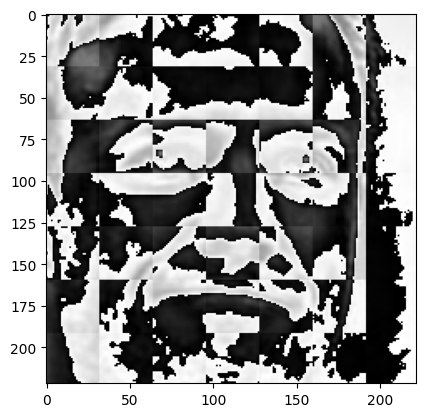

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'abd': ['./dataset/cropped/abd\\abd1.png',
  './dataset/cropped/abd\\abd10.png',
  './dataset/cropped/abd\\abd11.png',
  './dataset/cropped/abd\\abd12.png',
  './dataset/cropped/abd\\abd13.png',
  './dataset/cropped/abd\\abd14.png',
  './dataset/cropped/abd\\abd15.png',
  './dataset/cropped/abd\\abd2.png',
  './dataset/cropped/abd\\abd3.png',
  './dataset/cropped/abd\\abd4.png',
  './dataset/cropped/abd\\abd5.png',
  './dataset/cropped/abd\\abd6.png',
  './dataset/cropped/abd\\abd7.png',
  './dataset/cropped/abd\\abd8.png',
  './dataset/cropped/abd\\abd9.png'],
 'msd': ['./dataset/cropped/msd\\msd1.png',
  './dataset/cropped/msd\\msd10.png',
  './dataset/cropped/msd\\msd11.png',
  './dataset/cropped/msd\\msd12.png',
  './dataset/cropped/msd\\msd13.png',
  './dataset/cropped/msd\\msd14.png',
  './dataset/cropped/msd\\msd15.png',
  './dataset/cropped/msd\\msd16.png',
  './dataset/cropped/msd\\msd17.png',
  './dataset/cropped/msd\\msd18.png',
  './dataset/cropped/msd\\msd19.png',
  './da

In [32]:
class_dict ={}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'abd': 0, 'msd': 1, 'sachin': 2, 'virat': 3, 'yuvi': 4}

In [33]:
x=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (64, 64))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(64,64))
        combined_img = np.vstack((scalled_raw_img.reshape(64*64*3,1),scalled_img_har.reshape(64*64,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [34]:
64*64*3+64*64

16384

In [35]:
len(x[0])

16384

In [36]:
X = np.array(x).reshape(len(x),16384).astype(float)
X.shape

(228, 16384)

In [37]:
X[0]

array([ 11.,  12.,   9., ..., 183., 183.,   0.], shape=(16384,))

In [38]:
y[0]

0

#Data cleaning process is done .Now we are reay to train our model

In [39]:
import sys
!{sys.executable} -m pip install scikit-learn

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8947368421052632

In [42]:
len(X_test)

57

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.83      1.00      0.91        15
           2       1.00      0.90      0.95        10
           3       0.92      1.00      0.96        24
           4       0.67      0.67      0.67         3

    accuracy                           0.89        57
   macro avg       0.88      0.75      0.76        57
weighted avg       0.91      0.89      0.87        57



In [44]:
import sys
!{sys.executable} -m pip install pandas

In [45]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(probability=True),
        'params': {
            'svc__C': [0.1, 1, 10],
            'svc__kernel': ['linear', 'rbf'],
            'svc__gamma': ['scale', 0.01]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [100, 200],
            'randomforestclassifier__max_depth': [None, 20],
            'randomforestclassifier__max_features': ['sqrt'],
            'randomforestclassifier__min_samples_split': [2, 5],
            'randomforestclassifier__min_samples_leaf': [1, 2]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='saga', multi_class='multinomial', max_iter=3000),
        'params': {
            'logisticregression__C': [0.1, 1, 10],
            'logisticregression__penalty': ['l1', 'l2']
        }
    }
}


In [47]:
scores = []
best_estimators = {} 
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\jashu.LAPTOP-I6NQEKAC\Desktop\Cricketers_Classification_Model\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\jashu.LAPTOP-I6NQEKAC\Desktop\Cricketers_Classification_Model\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jashu.LAPTOP-I6NQEKAC\Desktop\Cricketers_Classification_Model\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\jashu.LAPTOP-I6NQEKAC\Desktop\Cricketers_Classification_Model\venv\lib\site-packages

,model,best_score,best_params
0,svm,0.824370,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k..."
1,random_forest,0.783529,"{'randomforestclassifier__max_depth': None, 'r..."
2,logistic_regression,0.860000,"{'logisticregression__C': 0.1, 'logisticregres..."


In [48]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=0.1, kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(min_samples_split=5,
                                         n_estimators=200))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, max_iter=3000,
                                     multi_class='multinomial',
                                     solver='saga'))])}

In [49]:
best_estimators['svm'].score(X_test,y_test)

0.8771929824561403

In [50]:
best_estimators['random_forest'].score(X_test,y_test)

0.8596491228070176

In [51]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8771929824561403

In [53]:
best_clf = best_estimators['svm']

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 1,  1,  0,  3,  0],
       [ 0, 15,  0,  0,  0],
       [ 0,  1,  9,  0,  0],
       [ 0,  0,  0, 24,  0],
       [ 0,  1,  1,  0,  1]])

In [55]:
import sys
!{sys.executable} -m pip install seaborn

Text(95.72222222222221, 0.5, 'Truth')

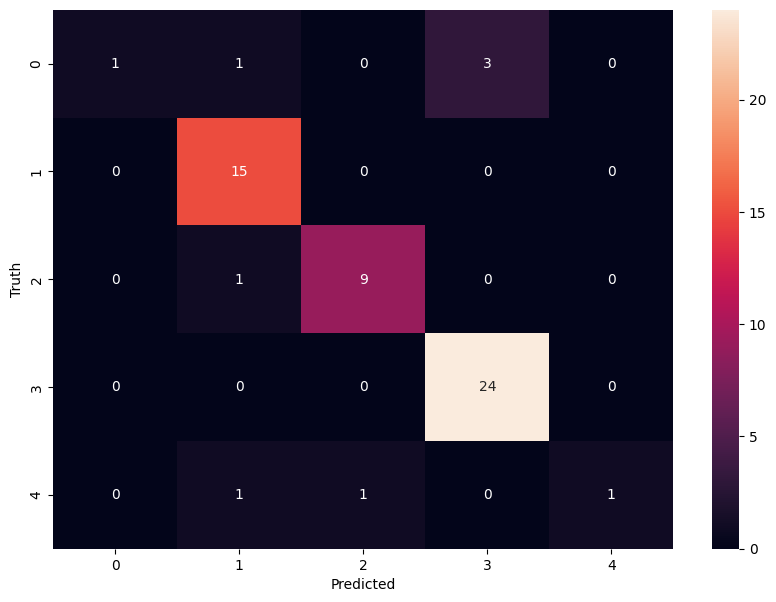

In [56]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
class_dict

{'abd': 0, 'msd': 1, 'sachin': 2, 'virat': 3, 'yuvi': 4}

#Save the trained model

In [60]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [61]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))